# Predicción de Enfermedades del Corazón - Carga y Preparación del Dataset

En este notebook, realizaremos la carga, exploración y preparación del dataset para la predicción de enfermedades del corazón. En esta sección realizaremos:
1. Cargaremos el dataset.
2. Exploraremos los datos (EDA).
3. Preprocesaremos los datos (binarización, normalización, división en entrenamiento/prueba).
4. Documentaremos los hallazgos.

## 1. Cargar el Dataset

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# Cargar el archivo CSV en un DataFrame
file_path = "HEART_DISEASE_PREDICTION.CSV"
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## 2. Exploración de los Datos (EDA)


Información del dataset:
<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    str    
dtypes: float64(

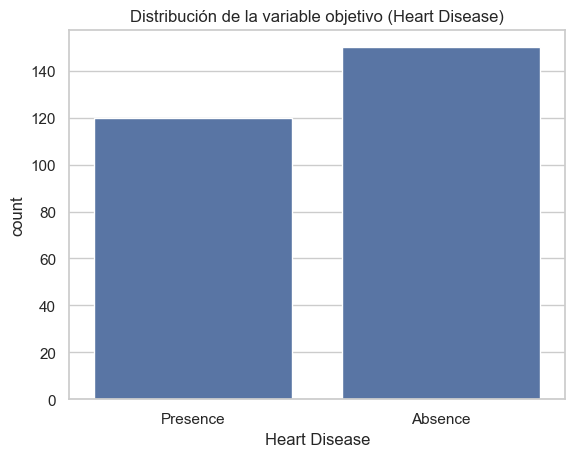

In [3]:
# Información general del dataset
print("\nInformación del dataset:")
df.info()

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
df.describe()

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Distribución de la variable objetivo
print("\nDistribución de la variable objetivo (Heart Disease):")
print(df['Heart Disease'].value_counts())

# Visualización de la distribución de la variable objetivo
sns.countplot(data=df, x='Heart Disease')
plt.title("Distribución de la variable objetivo (Heart Disease)")
plt.show()

## 3. Preprocesamiento de los Datos

In [4]:
# Binarizar la columna objetivo (Heart Disease)
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

# Seleccionar características relevantes
selected_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']
X = df[selected_features]
y = df['Heart Disease']

# Normalizar las características numéricas
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento (70%) y prueba (30%) de forma estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.3, stratify=y, random_state=42
)

## 4. Resumen de los Datos

In [5]:
# Resumen de los datos
print("\nResumen de los datos:")
print(f"Total de muestras: {len(df)}")
print(f"Distribución de clases (Heart Disease):\n{y.value_counts(normalize=True) * 100}")
print(f"Características seleccionadas: {selected_features}")
print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")


Resumen de los datos:
Total de muestras: 270
Distribución de clases (Heart Disease):
Heart Disease
0    55.555556
1    44.444444
Name: proportion, dtype: float64
Características seleccionadas: ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']
Tamaño del conjunto de entrenamiento: 189
Tamaño del conjunto de prueba: 81


### Resumen de la exploración y preprocesamiento
- **Total de muestras**: 270
- **Distribución de clases**:
  - Presencia de enfermedad: ~44.44%
  - Ausencia de enfermedad: ~55.56%
- **Características seleccionadas**: Edad, Presión Arterial, Colesterol, Frecuencia Cardíaca Máxima, Depresión ST, Número de Vasos Fluorados.
- **Tamaño del conjunto de entrenamiento**: 70% (189 muestras)
- **Tamaño del conjunto de prueba**: 30% (81 muestras)
- **Normalización**: Todas las características numéricas fueron escaladas para tener media 0 y desviación estándar 1.